In [149]:
#import important Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import GaussianNB #here we are importing gaussianNB because data has only 2 condition either breast cancer yes or no
#logistics regression will work here
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_curve, auc, roc_curve

In [150]:
#load dataset of MAsroom
df=pd.read_csv('Masroom.csv')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [151]:
#check dataset columns name
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [152]:
print('Dataset_Shape:',df.shape)
#check dataset shape, 8124 rows, 23 columns

Dataset_Shape: (8124, 23)


In [153]:
#check data type
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [154]:
#print dataset
print(df)

     class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0        p         x           s         n       t    p               f   
1        e         x           s         y       t    a               f   
2        e         b           s         w       t    l               f   
3        p         x           y         w       t    p               f   
4        e         x           s         g       f    n               f   
...    ...       ...         ...       ...     ...  ...             ...   
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0               c         n

In [155]:
#desride dataset
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [156]:
#lets print head 15 columns
df.head(15)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [157]:
#lets print bottom 10 rows
df.tail(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8114,p,f,y,c,f,m,a,c,b,y,...,y,c,c,p,w,n,n,w,c,d
8115,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,v,l
8116,p,k,y,n,f,s,f,c,n,b,...,k,p,w,p,w,o,e,w,v,l
8117,p,k,s,e,f,y,f,c,n,b,...,s,p,w,p,w,o,e,w,v,d
8118,p,k,y,n,f,f,f,c,n,b,...,s,p,w,p,w,o,e,w,v,d
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [158]:
#print sample rows
df.sample(12)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
2500,e,f,s,w,f,n,f,w,b,h,...,f,w,w,p,w,o,e,k,s,g
2247,e,x,f,g,f,n,f,w,b,n,...,f,w,w,p,w,o,e,n,a,g
1811,e,f,f,n,t,n,f,c,b,n,...,s,g,w,p,w,o,p,k,v,d
1402,e,x,f,g,t,n,f,c,b,n,...,s,g,p,p,w,o,p,k,y,d
6947,p,k,y,e,f,s,f,c,n,b,...,s,p,p,p,w,o,e,w,v,p
6581,p,f,y,n,f,s,f,c,n,b,...,s,p,w,p,w,o,e,w,v,d
6732,p,f,s,e,f,y,f,c,n,b,...,s,w,w,p,w,o,e,w,v,d
3712,e,f,y,n,t,n,f,c,b,u,...,s,w,p,p,w,o,p,k,v,d
5944,p,x,y,n,f,s,f,c,n,b,...,s,p,w,p,w,o,e,w,v,p
3077,e,x,f,n,t,n,f,c,b,u,...,s,w,w,p,w,o,p,k,v,d


In [159]:
#lets check the null values
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There is no null values in dataset

<AxesSubplot:>

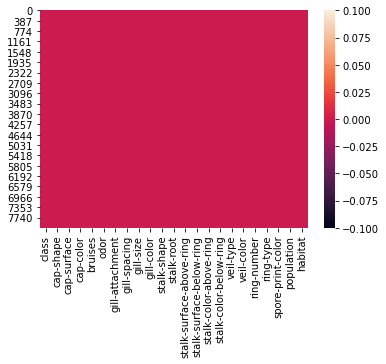

In [160]:
#we can cehck null values by heatmap
sns.heatmap(df.isnull())

In [161]:
#lets check uniqueness of class
df['class'].unique

<bound method Series.unique of 0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object>

As we can check that there two type of unique values in column 'class'_ e, p

In [162]:
#count total value of class
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

There is two target value, p-Poisonous Oak=3916, e-edible=4208 mushroom. So this is a catagorical data and we can use Classification

# Data Visulization

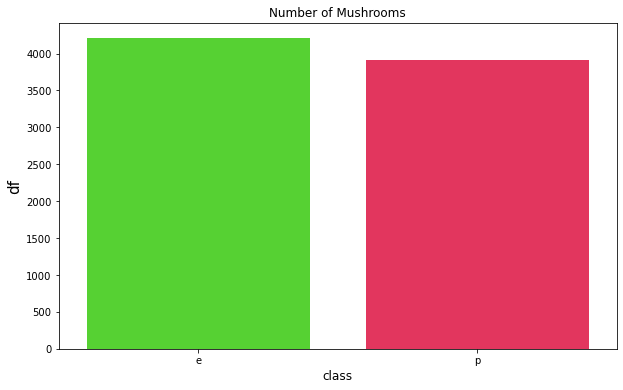

In [163]:
#lets visulize data of e & p mushrooms by using seaborn
df_class=df['class'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(df_class.index, df_class.values, alpha=0.9, palette='prism')
plt.ylabel('df', fontsize=15)
plt.xlabel('class', fontsize=12)
plt.title('Number of Mushrooms')
plt.show()

As we can see that in bar plot data is balanced

As we can see that the data values are alphabetic, so We have to convert values into intergiors values so now we will use Labelencoder 

In [164]:
#lets convert values into intergiots, we already import library
labelencoder= LabelEncoder()
for column in df:
    df[column]=labelencoder.fit_transform(df[column])

In [165]:
#lets check data first 10 rows to check values
df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
5,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1
6,0,0,2,8,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,2,3
7,0,0,3,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,3,3
8,1,5,3,8,1,6,1,0,1,7,...,2,7,7,0,2,1,4,2,4,1
9,0,0,2,9,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,3,3


we can drop the columns which contain less values or 0 value

In [166]:
df=df.drop(['veil-type'],axis=1)

In [167]:
df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


Now we can see that here only 22 columns are present, we dropped 1 column= veil-type

# Data Co-Relation

In [168]:
#lets check data co-relation between variables
df_cor=df.corr()
df_cor

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.334593,-0.298801,-0.154003,-0.146730,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.118617,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


<AxesSubplot:>

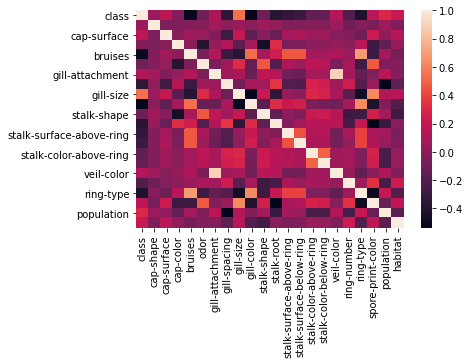

In [169]:
#lets check correlation by heatmap
sns.heatmap(df.corr())

<AxesSubplot:>

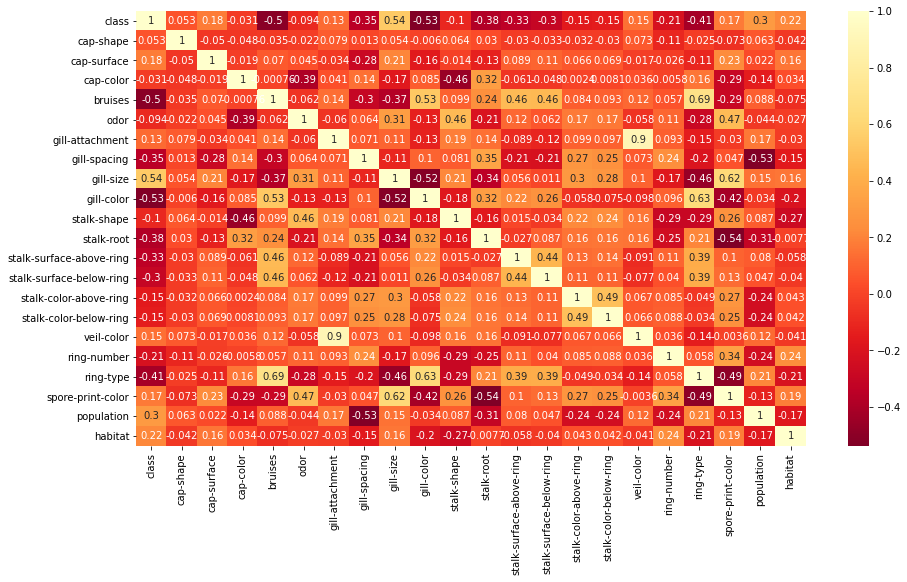

In [170]:
#checking heatmap co-relation with data numbers
plt.figure(figsize=(15,8))
sns.heatmap(df_cor,cmap='YlOrRd_r',annot=True)

Here we can see that there is nagetive correlation between class and 'gill-color' is -0.53, let check it closely

In [171]:
#we can check groupby class & gill-color
df[['class','gill-color']].groupby(['gill-color'], as_index=False).mean().sort_values(by='class', ascending=False)

,gill-color,class
0,0,1.000000
8,8,1.000000
3,3,0.721311
2,2,0.670213
7,7,0.428954
11,11,0.255814
10,10,0.204659
4,4,0.156863
5,5,0.106870
9,9,0.097561


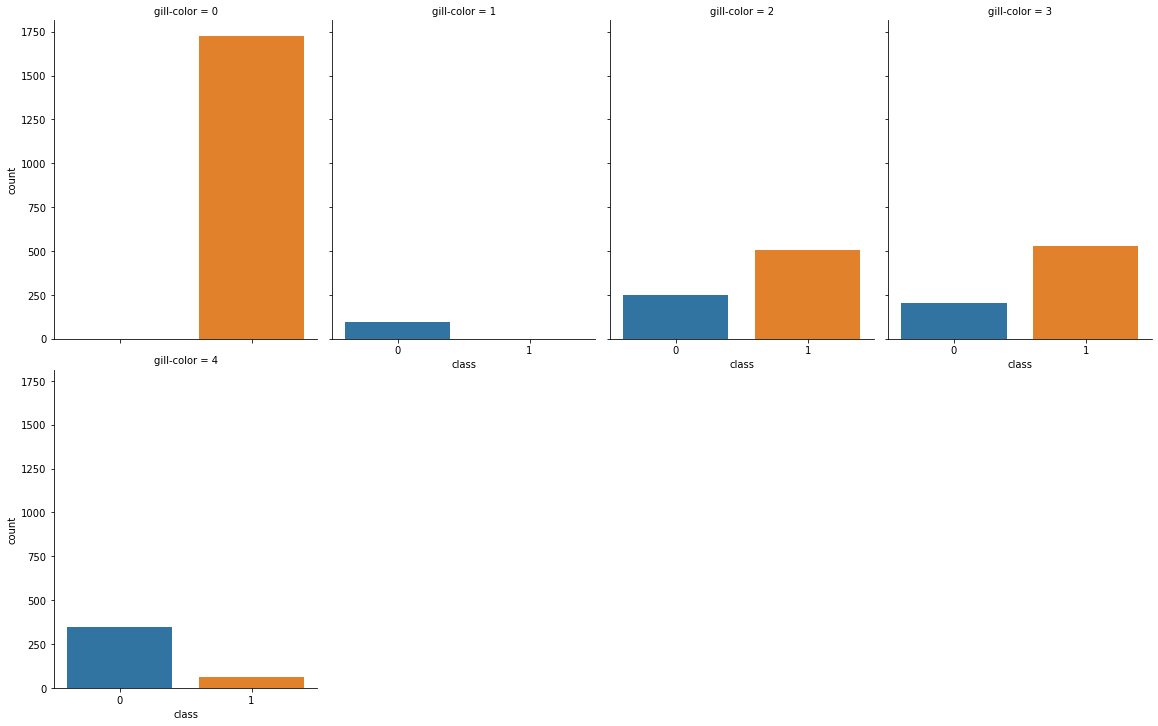

In [172]:
#lets check the features where value less than or equal to 4.5
df_var=df[['class','gill-color']]
df_var=df_var[df_var['gill-color']<=4.5]
sns.factorplot('class',col='gill-color', data=df_var, kind='count', size=5.0, aspect=.8, col_wrap=4)

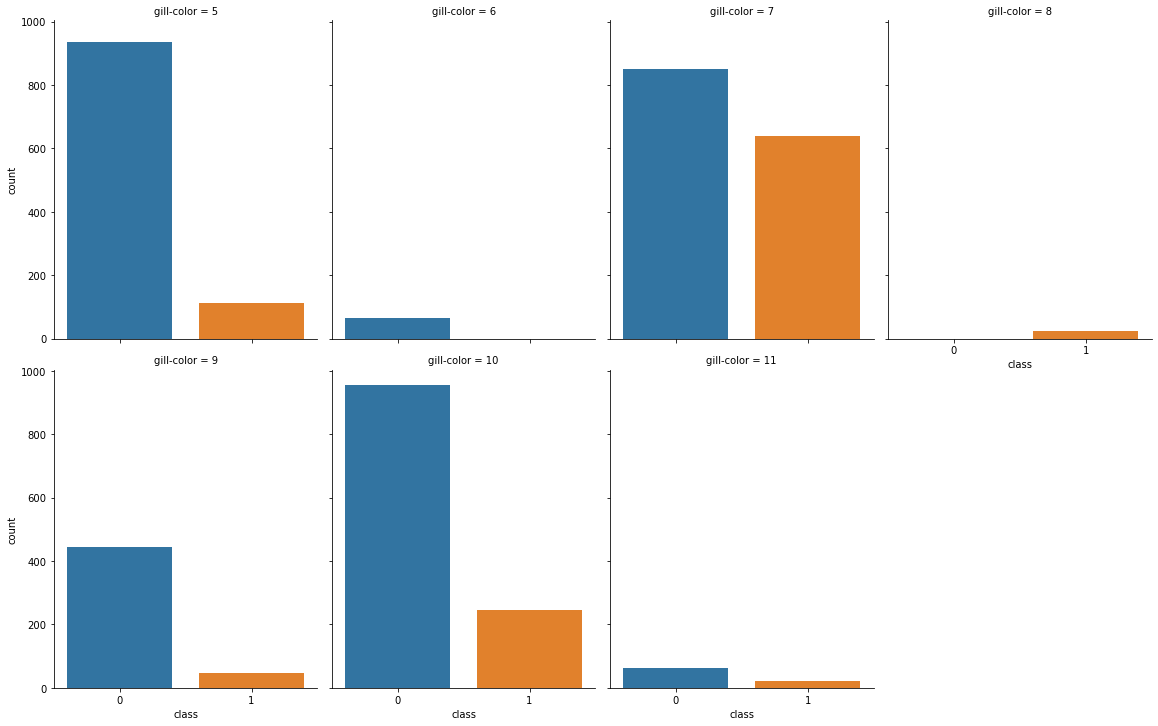

In [173]:
#lets check features where value greater than 4.5
df_var=df[['class','gill-color']]
df_var=df_var[df_var['gill-color']>4.5]
sns.factorplot('class',col='gill-color', data=df_var, kind='count', size=5.0, aspect=.8, col_wrap=4)

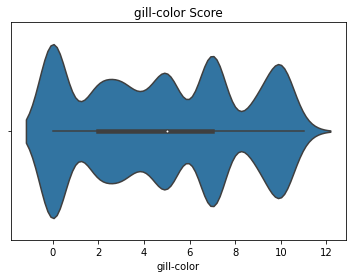

In [174]:
#plotting in violinplot with figure and , title

sns.violinplot(df['gill-color'])
plt.title('gill-color Score')
plt.show()

[Text(0, 0, 'cap-shape'),
 Text(1, 0, 'cap-surface'),
 Text(2, 0, 'cap-color'),
 Text(3, 0, 'bruises'),
 Text(4, 0, 'odor'),
 Text(5, 0, 'gill-attachment'),
 Text(6, 0, 'gill-spacing'),
 Text(7, 0, 'gill-size'),
 Text(8, 0, 'gill-color'),
 Text(9, 0, 'stalk-shape'),
 Text(10, 0, 'stalk-root'),
 Text(11, 0, 'stalk-surface-above-ring'),
 Text(12, 0, 'stalk-surface-below-ring'),
 Text(13, 0, 'stalk-color-above-ring'),
 Text(14, 0, 'stalk-color-below-ring'),
 Text(15, 0, 'veil-color'),
 Text(16, 0, 'ring-number'),
 Text(17, 0, 'ring-type'),
 Text(18, 0, 'spore-print-color'),
 Text(19, 0, 'population'),
 Text(20, 0, 'habitat')]

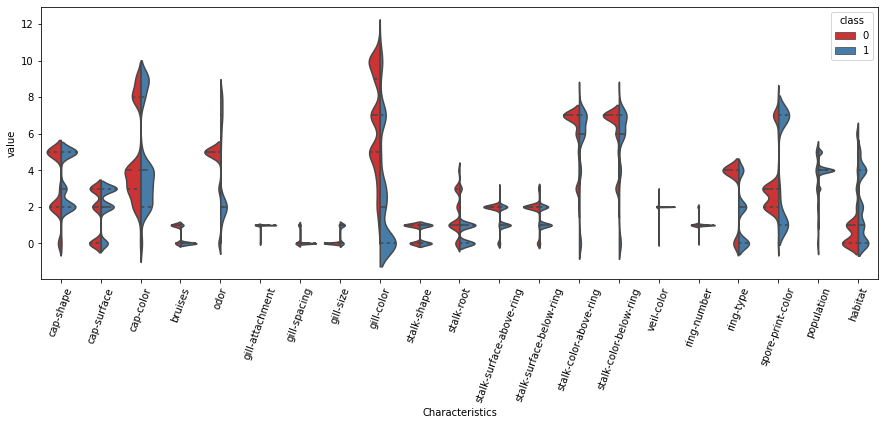

In [175]:
#Charactiristics of dataset
df_div=pd.melt(df,'class',var_name='Characteristics')
fig,ax=plt.subplots(figsize=(15,5))
p=sns.violinplot(ax=ax,x='Characteristics', y='value', hue='class', split=True, data=df_div, inner='quartile', palette='Set1')
df_no_type= df.drop(['class'],axis=1)
p.set_xticklabels(rotation=70, labels= list(df_no_type.columns))

Here, violinplot presenting the distrubution of dataset classification characteristics

In [176]:
#sns.pairplot(df) m not runnig here because data is huge

# Prepare the data for Predicution and model training

In [177]:
#drop'class' cloumn
x=df.drop(['class'], axis=1)
y=df['class']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25, random_state=42)

In [178]:
x_train.shape

(6093, 21)

In [179]:
x_test.shape

(2031, 21)

In [180]:
y_test.shape

(2031,)

In [181]:
y_train.shape

(6093,)

# Model Training

# Logistic Regression Classifier

In [182]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

lg.fit(x_train,y_train)

pred=lg.predict(x_test)
print(pred)
print('\n')
print('accuracy_score:', accuracy_score(pred,y_test))
print('\n')
print('confusion_matrix:', confusion_matrix(pred,y_test))
print('\n')
print('classification_report:', classification_report(pred,y_test))

[0 1 1 ... 0 0 1]


accuracy_score: 0.9497784342688331


confusion_matrix: [[989  51]
 [ 51 940]]


classification_report:               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1040
           1       0.95      0.95      0.95       991

    accuracy                           0.95      2031
   macro avg       0.95      0.95      0.95      2031
weighted avg       0.95      0.95      0.95      2031



# Using Algorithms

# GussainNB 

In [183]:
#data has two target output 0,1 so we use gussainNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,predgnb))
print('\n')
print('confusion_matrix:',confusion_matrix(y_test,predgnb))
print('\n')
print('classification_report:', classification_report(y_test,predgnb))

accuracy_score: 0.9266371245691778


confusion_matrix: [[958  82]
 [ 67 924]]


classification_report:               precision    recall  f1-score   support

           0       0.93      0.92      0.93      1040
           1       0.92      0.93      0.93       991

    accuracy                           0.93      2031
   macro avg       0.93      0.93      0.93      2031
weighted avg       0.93      0.93      0.93      2031



In GussianNB accuracy score=0.92

# DecisionTreeClassifier

In [184]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,predgnb))
print('\n')
print('confusion_matrix:',confusion_matrix(y_test,predgnb))
print('\n')
print('classification_report:', classification_report(y_test,predgnb))

accuracy_score: 0.9266371245691778


confusion_matrix: [[958  82]
 [ 67 924]]


classification_report:               precision    recall  f1-score   support

           0       0.93      0.92      0.93      1040
           1       0.92      0.93      0.93       991

    accuracy                           0.93      2031
   macro avg       0.93      0.93      0.93      2031
weighted avg       0.93      0.93      0.93      2031



In DecisiontreeClassifier accuracy_score= 0.92

# Support Vector Classifier

In [185]:
svc=SVC(kernel='rbf') #kernel='rbf'---> default
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,predgnb))
print('\n')
print('confusion_matrix:',confusion_matrix(y_test,predgnb))
print('\n')
print('classification_report:', classification_report(y_test,predgnb))

accuracy_score: 0.9266371245691778


confusion_matrix: [[958  82]
 [ 67 924]]


classification_report:               precision    recall  f1-score   support

           0       0.93      0.92      0.93      1040
           1       0.92      0.93      0.93       991

    accuracy                           0.93      2031
   macro avg       0.93      0.93      0.93      2031
weighted avg       0.93      0.93      0.93      2031



In SVC accuracy score=0.92

# KNeighborsClassifier

In [186]:
from sklearn.neighbors import KNeighborsClassifier
#k=5
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print('\n')
print(confusion_matrix(y_test,predknn))
print('\n')
print(classification_report(y_test,predknn))

0.9960610536681438


[[1033    7]
 [   1  990]]


              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1040
           1       0.99      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In KNeighborsClassifier accuracy score 0.99 which is very good according to other algorithms

In [187]:
#if we want to do all algoretheme in same for loop

model=[LogisticRegression(),DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),GaussianNB()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m, 'is:')
    print('\n')
    print(accuracy_score(y_test,predm))
    print('\n')
    print(confusion_matrix(y_test,predm))
    print('\n')
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression() is:


0.9497784342688331


[[989  51]
 [ 51 940]]


              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1040
           1       0.95      0.95      0.95       991

    accuracy                           0.95      2031
   macro avg       0.95      0.95      0.95      2031
weighted avg       0.95      0.95      0.95      2031



Accuracy score of DecisionTreeClassifier() is:


1.0


[[1040    0]
 [   0  991]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



Accuracy score of SVC() is:


0.9921221073362876


[[1038    2]
 [  14  977]]


              precision    recall  f1-score   support

           0       0.99      1.0

Accuracy Score of
LG=0.94
DTC=1.0
SVC=0.99
KNN=0.99
GNB=0.92

we can see that accuracy score is almost match to dataset but best accuracy score is DTC so we will save our model with DTC.

# Prediction

In [198]:
preds=dt.predict(x_test)
print(preds[:40])
print(y_test[:40].values)
#0=Edible Mashroom
#1=Poisonous Mashroom

[0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0
 1 1 1]
[0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0
 1 1 1]


Here we can see that prediction value and true matched 100%

From Cofusion_Matrix we can see that most of data is balanced. MOst of the classification methods matched 0.99 or 100% accuracy with dataset

# AUC_ROC Curve

In [188]:
#import Liabraries
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score

In [189]:
#we are using logisticregreesion for auc_roc curve prediction
y_pred_prob=lg.predict_proba(x_test)[:,1]
y_pred_prob

array([7.34849865e-07, 8.98246688e-01, 9.99920717e-01, ...,
       4.97429824e-02, 4.81167773e-02, 9.13824025e-01])

In [190]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [191]:
fpr #false positive report

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.61538462e-04,
       9.61538462e-04, 1.92307692e-03, 1.92307692e-03, 3.84615385e-03,
       3.84615385e-03, 4.80769231e-03, 4.80769231e-03, 5.76923077e-03,
       5.76923077e-03, 6.73076923e-03, 6.73076923e-03, 7.69230769e-03,
       7.69230769e-03, 8.65384615e-03, 8.65384615e-03, 9.61538462e-03,
       9.61538462e-03, 1.05769231e-02, 1.05769231e-02, 1.15384615e-02,
       1.15384615e-02, 1.25000000e-02, 1.25000000e-02, 1.34615385e-02,
       1.34615385e-02, 1.44230769e-02, 1.44230769e-02, 1.53846154e-02,
       1.53846154e-02, 1.63461538e-02, 1.63461538e-02, 1.73076923e-02,
       1.73076923e-02, 1.82692308e-02, 1.82692308e-02, 1.92307692e-02,
       1.92307692e-02, 2.01923077e-02, 2.01923077e-02, 2.11538462e-02,
       2.11538462e-02, 2.21153846e-02, 2.21153846e-02, 2.40384615e-02,
       2.40384615e-02, 2.50000000e-02, 2.50000000e-02, 2.59615385e-02,
       2.59615385e-02, 2.88461538e-02, 2.88461538e-02, 2.98076923e-02,
      

In [192]:
tpr #true positive report

array([0.        , 0.00100908, 0.27749748, 0.27749748, 0.28758829,
       0.28758829, 0.30171544, 0.30171544, 0.30676085, 0.30676085,
       0.30978809, 0.30978809, 0.31685166, 0.31685166, 0.33097881,
       0.33097881, 0.34510595, 0.34510595, 0.34611504, 0.34611504,
       0.35015136, 0.35015136, 0.44702321, 0.44702321, 0.56004036,
       0.56004036, 0.63572149, 0.63572149, 0.68314834, 0.68314834,
       0.73864783, 0.73864783, 0.79717457, 0.79717457, 0.81331988,
       0.81331988, 0.8234107 , 0.8234107 , 0.82643794, 0.82643794,
       0.83350151, 0.83350151, 0.8345106 , 0.8345106 , 0.83551968,
       0.83551968, 0.839556  , 0.839556  , 0.84258325, 0.84258325,
       0.84661958, 0.84661958, 0.84762866, 0.84762866, 0.84863774,
       0.84863774, 0.8506559 , 0.8506559 , 0.85166498, 0.85166498,
       0.85368315, 0.85368315, 0.85469223, 0.85469223, 0.85973764,
       0.85973764, 0.86276488, 0.86276488, 0.86377397, 0.86377397,
       0.86881937, 0.86881937, 0.87184662, 0.87184662, 0.87588

In [193]:
thresholds #we can check threshold

array([1.99996822e+00, 9.99968217e-01, 9.97237147e-01, 9.97181154e-01,
       9.96711546e-01, 9.96686252e-01, 9.96066289e-01, 9.95938696e-01,
       9.95703408e-01, 9.95639209e-01, 9.95433947e-01, 9.95411212e-01,
       9.95142994e-01, 9.95122661e-01, 9.93968188e-01, 9.93967958e-01,
       9.92983986e-01, 9.92907973e-01, 9.92837051e-01, 9.92758822e-01,
       9.92180224e-01, 9.91958293e-01, 9.80823923e-01, 9.80655362e-01,
       9.59012031e-01, 9.58978340e-01, 9.44965778e-01, 9.44923101e-01,
       9.34601954e-01, 9.34530371e-01, 9.20249946e-01, 9.20129434e-01,
       8.94161389e-01, 8.94068049e-01, 8.82731319e-01, 8.81882060e-01,
       8.75609083e-01, 8.75345154e-01, 8.73997391e-01, 8.72935904e-01,
       8.62517833e-01, 8.61503698e-01, 8.60681878e-01, 8.58983510e-01,
       8.56568135e-01, 8.49588152e-01, 8.44017212e-01, 8.41816301e-01,
       8.39603372e-01, 8.38067672e-01, 8.25639411e-01, 8.24216160e-01,
       8.23968327e-01, 8.15867038e-01, 8.14684345e-01, 8.13623286e-01,
      

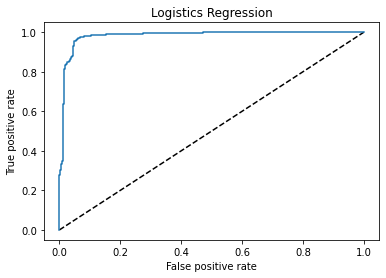

In [194]:
#plotting fpr,tpr from lg
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistics Regression')
plt.show()

In [195]:
#check accuracy score
auc_score=roc_auc_score(y_test,lg.predict(x_test))
print(auc_score)

0.9497491849724442


in Logisticregression accuracy score is= 0.94

In [196]:
#we can check accuracy score from DTC
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
p=dt.predict(x_test)
print(accuracy_score(y_test,p))

1.0


In DTC accuracy score is = 1.0 which is good more than lg

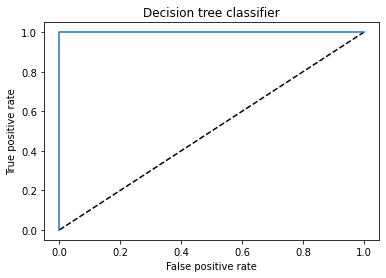

In [197]:
#Decision Tree Curve plotting
y_pred_prob=dt.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision tree classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision tree classifier')
plt.show()
auc_score=roc_auc_score(y_test,dt.predict(x_test))

# Saving Model

In [199]:
import joblib
# we can save our model as a object file
#we will save our model to use DecisiontreeClassifier because accuracy score of dtc is 100% matched, 1.0
joblib.dump(dtc,'DTCFILE.obj')

dtc_from_joblib=joblib.load('dtcfile.obj')
dtc_from_joblib.predict(x_test)

array([0, 1, 1, ..., 0, 0, 1])